In [1]:
import numpy as np # type: ignore
import os
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import scipy.stats as sis  # type: ignore
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## **SEÑALES ELECTROMIOGRÁFICAS**
### Las señales electromiográficas (EMG) son señales eléctricas que se generan en los procesos de activación muscular, generando potenciales eléctricos en los procesos de contracción y relajación muscular. Para captar estos impulsos, se utilizan electrodos de inserción, los cuales llegan hasta el tejido muscular que se desea evaluar, aunque también pueden ser electrodos superficiales. 
### La importancia del análisis de estas señales radica en la información que aporta acerca de patologías, biomecánica y deporte. En el caso de la medicina, la función muscular aporta información de diagnóstico de trastornos musculares, atrofia y enfermedades asociadas al sistema nervioso o a la interacción entre músculo y tejido neuronal. 
### Así mismo, permite analizar la fatiga muscular de actividades rutinarias y específicas, con el fin de determinar condiciones ergonómicas para dicha actividad, función muscular y eficiencia en los movimientos. También desde el aspecto biomecánico, es fundamental para el análisis y modelado de prótesis activas, de forma que se pueda emular con mayor exactitud el funcionamiento muscular de la parte remplazada. 
### Las características de la señal pueden variar dependiendo del movimiento ejecutado, de la condición muscular del paciente y de las fuentes de error, como la ubicación y adherencia de los electrodos (mejoran con la fijación de un gel conductor para el caso de electrodos superficiales), impedancia de la piel, y campos electromagnéticos externos, como celulares y demás aparatos electrónicos [1].

## **OPERADOR DE ENERGÍA DE TEAGER KAISER (TKEO)**
### Para el análisis de las señales electromiográficas, es importante conocer como es el proceso de captación de las señales, las cuales deben ser amplificadas, filtradas y convertidas a digital, de tal manera que se puedan analizar en ordenadores. Dentro del proceso de filtrado, una operación importante que se puede utilizar es el Operador de Energía de Teager – Kaiser (TKEO), el cual permite reducir la relación señal/ruido de una señal electromiográfica, disminuyendo la detección errónea de inicio, es decir, captando la energía propia del movimiento muscular o de potenciales de acción muscular individuales. 
### El TKEO toma la señal y la rectifica (convierte todos los valores a positivo) y se eleva al cuadrado para remarcar picos y cambios en la amplitud, posteriormente se calcula la primera derivada de la señal, de forma que los cambios rápidos de amplitud propios de una frecuencia específica (asociados al movimiento muscular) son enfatizados y promediados para suavizar la señal, haciendo que esta sea menos ruidosa. En conclusión, el TKEO mide los cambios instantáneos de energía de la señal [2].

## **REFERENCIAS**
### [1]L. Gila, A. Malanda, I. R. Carreño, J. R. Falces, and J. Navallas, “Métodos de procesamiento y análisis de señales electromiográficas Electromyographic signal processing and analysis methods,” 2009.  
### [2]S. Solnik, P. Rider, K. Steinweg, P. Devita, and T. Hortobágyi, “Teager-Kaiser energy operator signal conditioning improves EMG onset detection”, doi: 10.1007/s00421-010-1521-8.

## 1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).
### Para este propósito aplicaremos el factor TKEO con una señal de prueba, Paciente "n", Primera serie. Además de esto se irán definiendo funciones conforme se vayan necesitando, ya sea para cargar los datos del paciente, o para transformar sus datos en un Dataframe.

In [2]:
ruta='.\\EMG_data_for_gestures-master'
def carpetas_pacientes(ruta):    
    lista_pacientes=os.listdir(ruta)
    rutas=[]
    for i in range(len(lista_pacientes)):
        if lista_pacientes[i].endswith('.txt'):
            del lista_pacientes[i]
    for i in range(len(lista_pacientes)):
        ruta_r=ruta+'\\'+lista_pacientes[i]+'\\'
        rutas.append(ruta_r)
    return rutas
def series_pacientes(carpetas):
    rutas=[]
    for i in range(len(carpetas)):
        datos=os.listdir(carpetas[i])    
        ser1=carpetas[i]+datos[0]
        ser2=carpetas[i]+datos[1]
        rutas.append([ser1,ser2])
    return rutas
carpetas=carpetas_pacientes(ruta)
series=series_pacientes(carpetas)

In [3]:
contador_paciente=int(input('Ingrese al paciente: '))
paciente=carpetas[contador_paciente-1]
def txt2df(ruta):
    r_series=os.listdir(ruta)
    df1=pd.DataFrame(pd.read_csv(ruta+r_series[0],sep='\t',low_memory=False))
    df2=pd.DataFrame(pd.read_csv(ruta+r_series[1],sep='\t',low_memory=False))
    return df1,df2


In [4]:
def clasificar_movimientos(df1):
    n0=df1[df1['class']==0]
    n1=df1[df1['class']==1]
    n2=df1[df1['class']==2]
    n3=df1[df1['class']==3]
    n4=df1[df1['class']==4]
    n5=df1[df1['class']==5]
    n6=df1[df1['class']==6]
    n7=df1[df1['class']==7]
    if len(n7) == 0:
        return n0,n1,n2,n3,n4,n5,n6
    else:
        return n0,n1,n2,n3,n4,n5,n6,n7    

### Ahora procedemos a definir la función TKEO para recibir los datos del paciente.

In [5]:
def TKEO(signal):
    tkeo = np.zeros_like(signal)    
    for n in range(1, len(signal) - 1):
        tkeo[n] = signal[n]**2 - signal[n-1] * signal[n+1]
    tkeo[0] = 0
    tkeo[-1] = 0    
    return tkeo

### Una vez definidad la función, vamos a aplicar la prueba cargando los datos del primer canal y haremos una comparación en el tiempo.

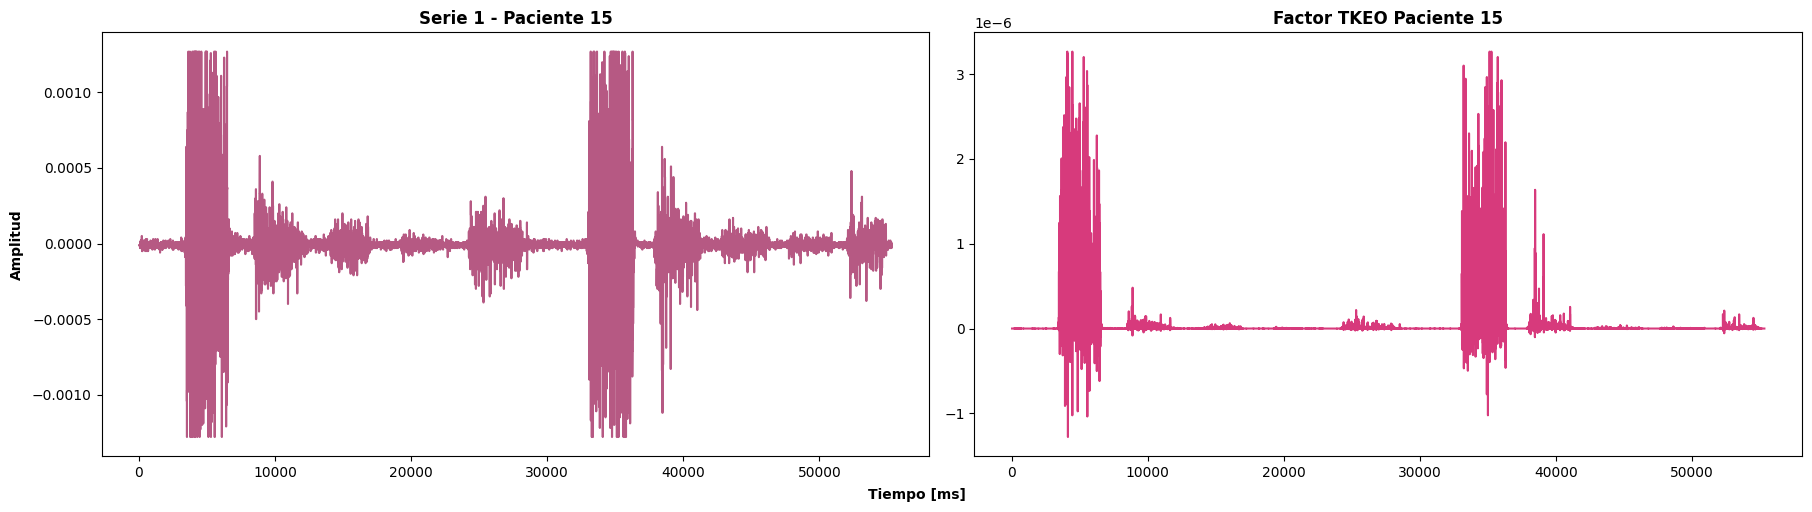

Valor-P Shapiro Canal 1: 9.699106173692047e-137
Valor-P Shapiro Canal 1 (TKEO): 5.993889599022826e-163
Valor-P Levene: 0.0
Homocedasticidad: Se rechaza
Valor-P prueba Mann-Whitney : 0.0


In [6]:
a,b=txt2df(paciente)
t=list(a['time'])
ch1=list(a['channel1'])
tk_ch1=TKEO(ch1)
sig1=sis.shapiro(ch1)[1]
sig2=sis.shapiro(tk_ch1)[1]
levene=sis.levene(ch1,tk_ch1)[1]
status='Se Acepta'
c1=np.random.rand(1,3)
c2=np.random.rand(1,3)
if levene<0.05:
    status='Se rechaza'
mw=sis.mannwhitneyu(ch1,tk_ch1)[1]
# Crear subplots
fig,axs = plt.subplots(1,2,figsize=(18,5))
axs[0].plot(t,ch1,color=c1)
axs[0].set_title(f'Serie 1 - Paciente {contador_paciente}',weight='bold')
axs[1].plot(t,tk_ch1,color=c2)
axs[1].set_title(f'Factor TKEO Paciente {contador_paciente}',weight='bold')
# Ajustar layout
plt.tight_layout()
#Labels de los ejes
fig.text(0.5,0, 'Tiempo [ms]', ha='center', va='center',weight='bold')
fig.text(0, 0.5, 'Amplitud', ha='center', va='center',weight='bold',rotation='vertical')
# Mostrar gráfico
plt.show()
print('Valor-P Shapiro Canal 1: {}'.format(sig1))
print('Valor-P Shapiro Canal 1 (TKEO): {}'.format(sig2))
print('Valor-P Levene: {}'.format(levene))
print(f'Homocedasticidad: {status}')
print('Valor-P prueba Mann-Whitney : {}'.format(mw))

### **SAPHIRO:**
### - Hipótesis nula: los datos distribuyen normalmente.
### - Hipótesis alternativa: los datos no distribuyen normalmente.

### **LEVENE:**
### - Hipótesis nula: homocedastisidad.
### - Hipótesis alternativa: hetetocedastisidad.

### **U de MANN WHITNEY:**
### - Hipótesis nula: no hay diferencias significativas en el valor de la mediana.
### - Hipótesis alternativa: hay diferencia significativa en el valor de las medianas.

### Dados los resultados, en las tres pruebas se rechaza las hipótesis nulas, teniendo que los datos no distribuyen normalmente, no hay igualdad entre las varianzas, y tampoco entre las medianas de los datos.

## 2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.

In [7]:
def TKEO_multiple(df):
    tkeo_data={}
    for i in range(1,9):
        ch=list(df[f'channel{i}'])
        tk=TKEO(ch)
        tkeo_data[f'channel{i}']=tk
    return pd.DataFrame(tkeo_data)

### Una vez creada la función, la llamaremos usando la misma señal de prueba del numeral anterior. Trabajaremos con la Serie 1 debido a que, con base en una inspección visual se logra identificar que los gestos están más remarcados, ofreciendo mayor información.

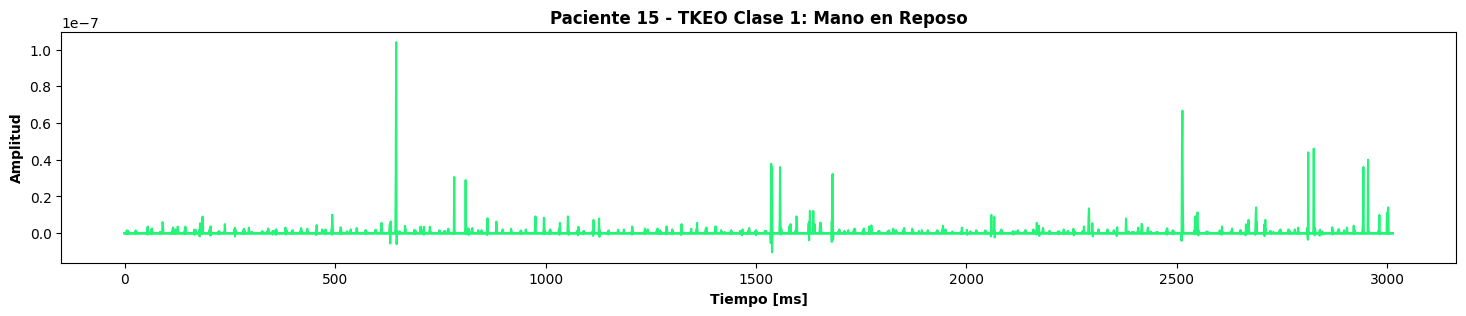

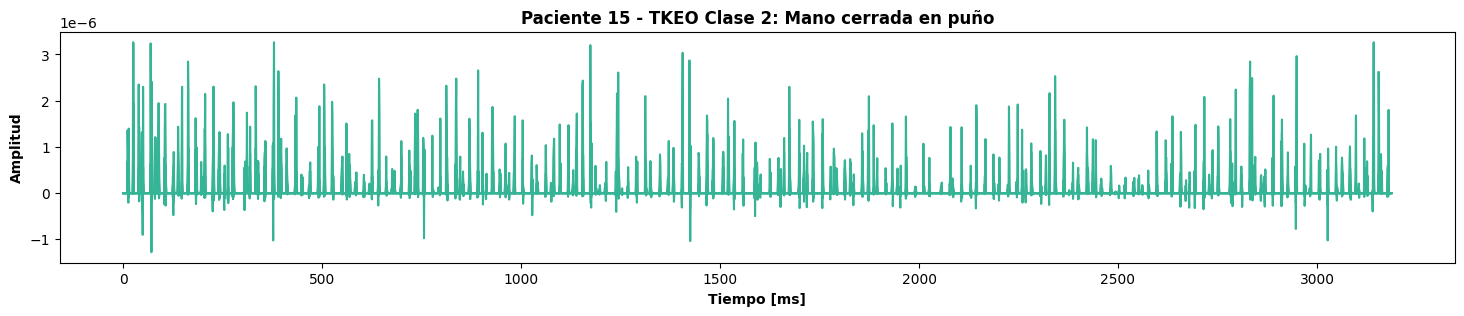

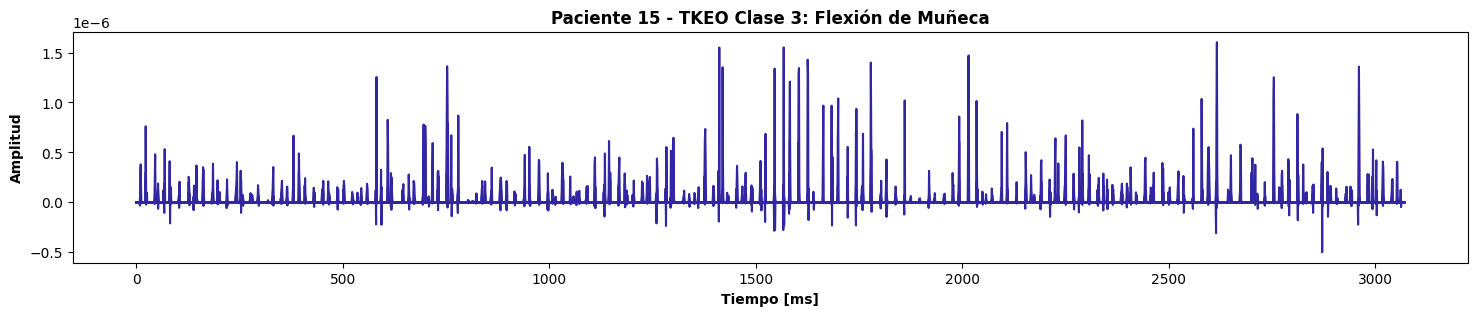

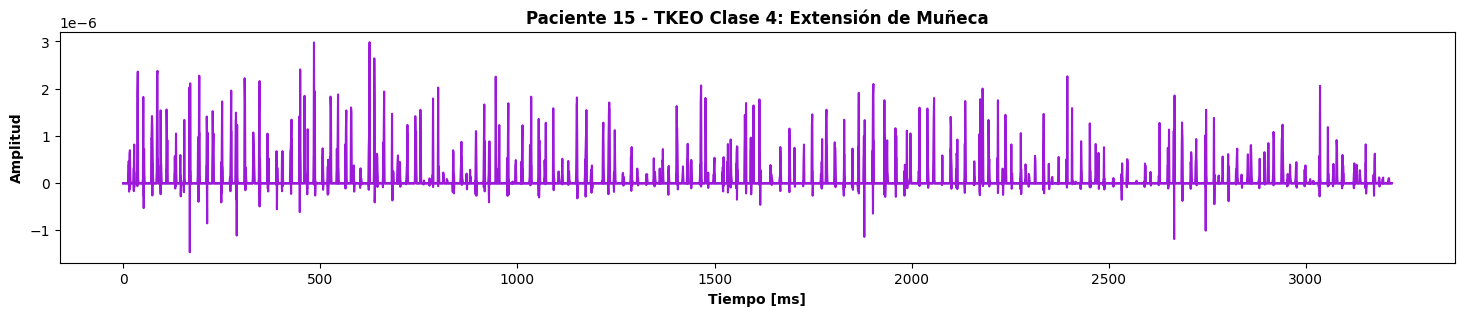

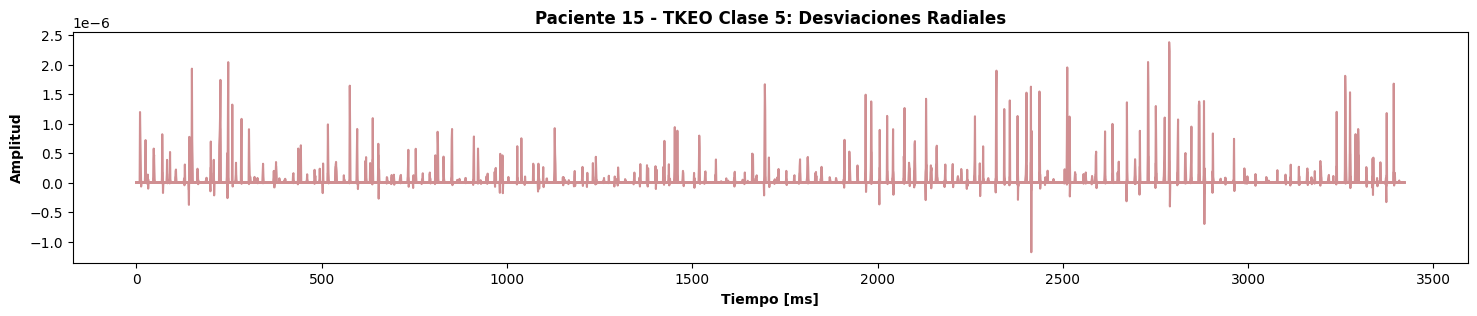

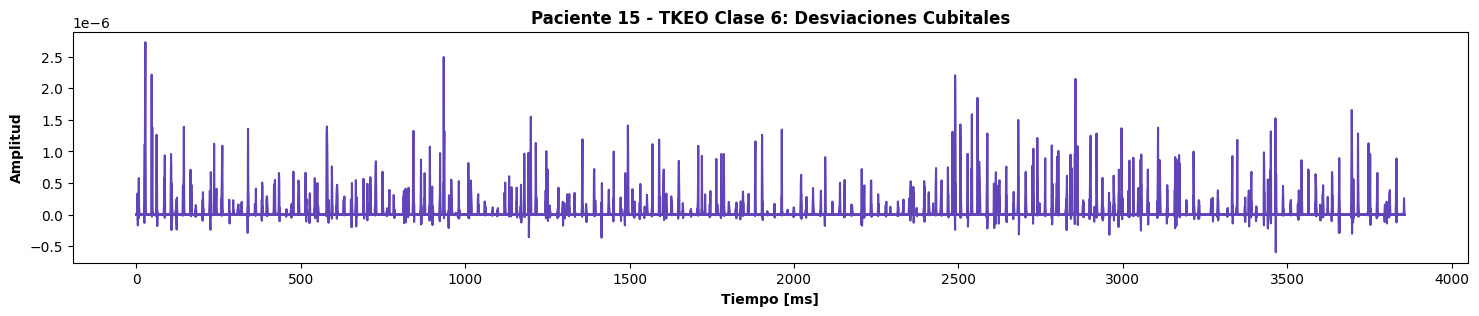

In [8]:
ser1=clasificar_movimientos(a)
col=np.random.rand(1,3)
clases={'1':'Mano en Reposo','2':'Mano cerrada en puño','3':'Flexión de Muñeca','4':'Extensión de Muñeca','5':'Desviaciones Radiales',
        '6':'Desviaciones Cubitales','7':'Palma Extendida'}
for i in range(1,len(ser1)):
    contador=str(i)
    col=np.random.rand(1,3)
    tk=TKEO_multiple(ser1[i])
    plt.figure(figsize=(18,3))
    plt.plot(tk,color=col)
    plt.title(f'Paciente {contador_paciente} - TKEO Clase {contador}: {clases[contador]}',weight='bold')
    plt.xlabel('Tiempo [ms]',weight='bold')
    plt.ylabel('Amplitud',weight='bold')
    plt.show()



## 3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal: [RMS, Varianza, Mean Absolute Value, Mean Absolute Value Slope, Slope Sign Changes, Wave form length, Zero Crossing].


In [9]:
def analisis_serie(df):
    resultados=[]
    indices=[]
    contador=0
    for i in range(1,len(df)):
        k=str(i)
        rms=np.sqrt(np.mean(df[i]**2))
        mean = np.mean(df[i])
        varianza=np.mean((df[i] - mean) ** 2)
        MAV=np.mean(np.abs(df[i]))
        MAVS=np.mean(np.abs(np.diff(df[i])))
        slopes = np.diff(df[i])
        sign_changes = np.sum(np.diff(np.sign(slopes)) != 0)
        WL=np.sum(np.abs(np.diff(df[i])))
        ZC=len(np.where(np.diff(np.sign(df[i])))[0])
        datos={'Clase':f'{clases[k]}','RMS':rms,'Varianza':varianza,'Mean Absolute Value':MAV,'Mean Absolute Value Slope':MAVS,
               'Slope Sign Changes':sign_changes,'Wave form length':WL,'Zero Crossing':ZC}
        contador+=1
        indices.append(contador)
        resultados.append(datos)
    return pd.DataFrame(resultados,index=indices)

In [10]:
print(f'Analisis Paciente {contador_paciente}')
ana1=analisis_serie(ser1)
display(ana1)

Analisis Paciente 15


,Clase,RMS,Varianza,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave form length,Zero Crossing
1,Mano en Reposo,6999.443081,4.624648e+07,1657.022045,1841.135609,17322,4.994264e+07,15729
2,Mano cerrada en puño,7994.968341,5.968630e+07,2057.480087,2286.088989,15003,6.559247e+07,11490
3,Flexión de Muñeca,9117.545569,7.696873e+07,2482.117787,2757.908678,14606,7.625066e+07,12126
4,Extensión de Muñeca,10396.598381,9.935721e+07,2955.004784,3283.338685,14233,9.509206e+07,11297
5,Desviaciones Radiales,11566.026884,1.223657e+08,3377.463365,3752.737098,15774,1.156106e+08,13543
6,Desviaciones Cubitales,12416.787410,1.404844e+08,3700.293795,4111.437580,17399,1.427203e+08,14633


## 4. Crear una rutina que aplique sobre todos los archivos de la base de datos las funciones descritas en 2 y 3.

In [11]:
def analisis_global(carpetas):
    n_s=input('Por favor Ingrese la serie que desea cargar para todos los pacientes: ')
    if n_s=='1':
        n_s=0
    if n_s=='2':
        n_s=1
    dataframe_global=pd.DataFrame(columns=['time','channel1','channel2','channel3','channel4','channel5','channel6','channel7','channel8','class'])
    for i in range(0,len(carpetas)):
        datos1,datos2=txt2df(carpetas[i])
        data=[datos1,datos2]
        data_serie=data[n_s]
        dataframe_global=pd.concat([dataframe_global,data_serie], ignore_index=True)
    ser_global=clasificar_movimientos(dataframe_global)
    ana_global=analisis_serie(ser_global)
    valores=ana_global.columns
    fig, axs = plt.subplots(1,7, figsize=(18,7))
    for i, ax in enumerate(axs.flatten()):
        if i < len(valores) - 1:
            sns.boxplot(data=ana_global[valores[i + 1]], ax=ax)
            ax.set_xlabel(f'{valores[i + 1]}', weight='bold')
            ax.set_ylabel('')
    display(ana_global)            
    plt.tight_layout()
    plt.show()
    return dataframe_global

## 5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales

### Se nos pide hacer una rutina que calcule los mismos datos estadísticos, pero en las señales originales, por lo que volvemos a definir un ciclo con estos valores como base.

,Clase,RMS,Varianza,Mean Absolute Value,Mean Absolute Value Slope,Slope Sign Changes,Wave form length,Zero Crossing
1,Mano en Reposo,7656.642826,5.545165e+07,1781.160901,1979.067671,705552,2.289077e+09,643906
2,Mano cerrada en puño,8937.219416,7.459011e+07,2298.647503,2554.052792,558832,2.794903e+09,460652
3,Flexión de Muñeca,10380.723490,9.961853e+07,2853.223957,3170.248841,567182,3.578970e+09,474748
4,Extensión de Muñeca,11850.940429,1.289945e+08,3383.826503,3759.807240,532608,4.198009e+09,427810
5,Desviaciones Radiales,13382.721177,1.638462e+08,3905.250537,4339.167276,561319,4.914836e+09,476854
6,Desviaciones Cubitales,15070.632347,2.070660e+08,4478.607924,4976.231036,565488,5.621504e+09,475723
7,Palma Extendida,19037.738118,3.298464e+08,5708.681046,6342.978962,30572,4.045742e+08,27038


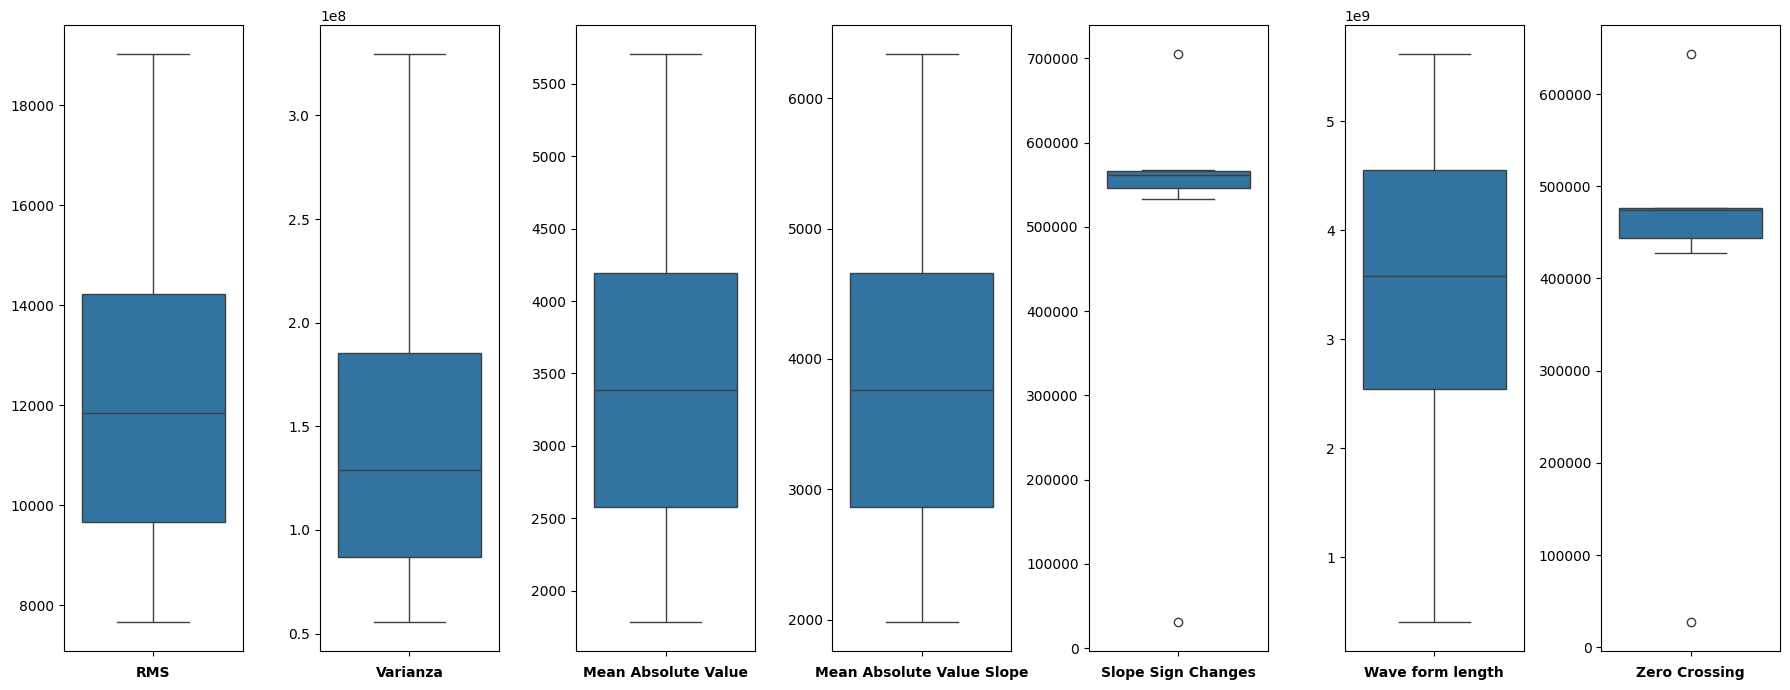

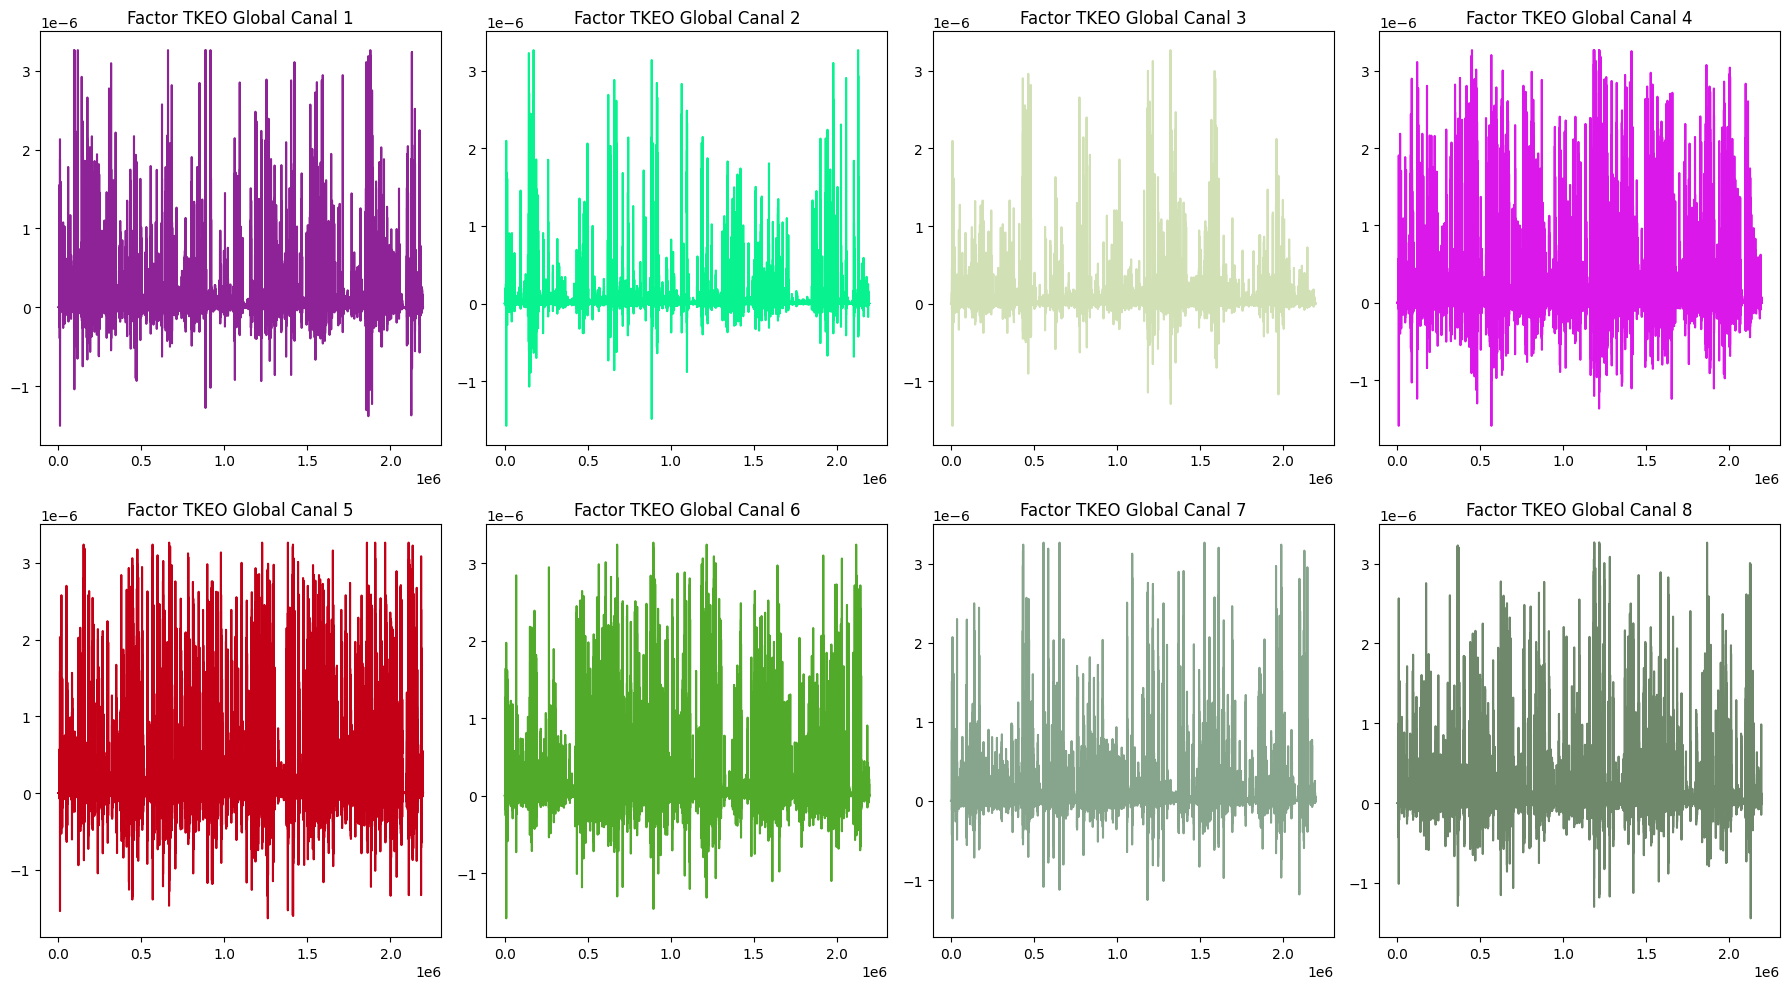

In [13]:
def procesamiento_base_de_datos(carpetas):
    serie_global=analisis_global(carpetas)
    tk=TKEO_multiple(serie_global)
    fig,axs=plt.subplots(2, 4, figsize=(18, 10))
    for i,ax in enumerate(axs.flatten(), 1):
        co=np.random.rand(1, 3)
        ax.plot(tk[f'channel{i}'], color=co)
        ax.set_title(f'Factor TKEO Global Canal {i}')
    plt.tight_layout()
    plt.show()
procesamiento_base_de_datos(carpetas)

## **Análisis Exploratorio:**

### A pesar de que los movimientos musculares realizados por cada paciente son los mismos, las diferencias entre los datos obtenidos se deben a distintas variables, como, por ejemplo, la percepción muscular, la capacidad conductiva de las fibras nerviosas en los músculos, la cantidad de vello corporal que puede afectar el valor de impedancia, diferencias milimétricas en la ubicación de los electrodos, cantidad de masa muscular, entre otras. 
### En cuanto a la señal de cada canal, se puede inferir que no hay una distribución normal a causa de la diferencia entre los máximos y mínimos, lo cual hace que haya un sesgo altamente marcado. No obstante, se requiere hacer un análisis estadístico para determinar fehacientemente esta condición.
### Del diagrama de cajas y bigotes se puede constatar lo ya mencionado anteriormente acerca de la distribución y homocedasticidad de los datos, puesto que la distribución de los datos en el rango intercuartílico está sesgada ligeramente hacia valores mayores a la media (excepto para los cambios en la pendiente y cruces por cero, que ocurre el caso contrario), es decir, hay una alta dispersión. Con cada uno de estos diagramas, se puede inferir que los datos no distribuyen normal y que no presentan homocedasticidad, pero esto se puede afirmar o desmentir con las pruebas estadísticas realizadas a continuación.
### En cuanto al TKEO, este muestra una línea recta, lo cual se puede justificar con la magnitud de los datos obtenidos, los cuales al ser tan pequeños, no van a mostrar una diferencia significativa entre sí, teniendo en cuenta que el TKEO calcula la diferencia entre el cuadrado de un punto y su punto adyacente, lo cual podría considerarse despreciable.

## **Conclusiones:**
### - Los valores de significancia extremadamente pequeños indican una fuerte evidencia en contra de la hipótesis nula en cada prueba realizada. En la prueba de Shapiro-Wilk y en la de Levene, los valores cercanos a cero sugieren que los datos no se distribuyen normalmente (para Shapiro) y que las varianzas entre los grupos son significativamente diferentes (para Levene). Respecto a la prueba de Mann-Whitney, una significancia de cero indica que existe una diferencia notable entre las distribuciones de las dos muestras.

### - Hay diversos factores que afectan la obtención de los datos. El tener un ambiente controlado ante estas fuentes de error, permite estimar con mayor precisión los potenciales eléctricos de la actividad muscular.

### - Al obtener un factor TKEO casi constante, se evidencia que no hay cambios bruscos en la maginitud de la señal, por el contrario, el movimiento muscular (contracción y relajación) es un movimiento natural.